## Pair Programming Preprocesado


Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:


- Estandarizar las variables numéricas de vuestro set de datos
- Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.
- Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.
- Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
# Tratamiento de los datos
# ========================
import numpy as np
import pandas as pd

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarización variables numéricas y Codificación variables categóricas
# ========================================================================
from sklearn.preprocessing import RobustScaler

# Gestión datos desbalanceados
# ============================
from imblearn.combine import SMOTETomek

# Separación de los datos en train y test
# =======================================
from sklearn.model_selection import train_test_split


# Establecer preferencias de visualización
# ========================================
plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 


In [2]:
df = pd.read_pickle('../datos/Invistico_Airline_2.pkl')
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,2,2,4,2,3,0,3,5,3,2,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,3,0,2,2,4,4,4,2,3,2,305.0


# Estandarización

Aplicamos el RobustScaler en las numéricas

In [3]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.head()

,age,flight_distance
0,65,265
1,47,2464
2,15,2138
3,60,623
4,70,354


In [4]:
scaler = RobustScaler()

scaler.fit(df_numericas)

X_escaladas = scaler.transform(df_numericas)


df_numericas_estandar = pd.DataFrame(X_escaladas, columns = df_numericas.columns)
df_numericas_estandar.head(2)

,age,flight_distance
0,1.041667,-1.400844
1,0.291667,0.454852


Suprimimos estas columnas para poder reemplzarlas por su versión estandarizada

In [5]:
df.drop(["age", "flight_distance"], axis = 1, inplace=True)
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,2,2,4,2,3,0,3,5,3,2,0.0
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,3,0,2,2,4,4,4,2,3,2,305.0
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,2,0,2,3,3,4,4,4,2,0.0
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,3,4,3,1,0,1,4,1,3,0.0
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,4,3,4,2,0,2,4,2,5,0.0


In [6]:
df = pd.concat([df, df_numericas_estandar], axis = 1)
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,arrival_delay_in_minutes,age,flight_distance
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,2,2,4,2,3,0,3,5,3,2,0.0,1.041667,-1.400844
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,3,0,2,2,4,4,4,2,3,2,305.0,0.291667,0.454852
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,2,0,2,3,3,4,4,4,2,0.0,-1.041667,0.179747
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,3,4,3,1,0,1,4,1,3,0.0,0.833333,-1.098734
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,4,3,4,2,0,2,4,2,5,0.0,1.250000,-1.325738


In [7]:
lista_categoricas = ['gender', 'customer_type', 'type_of_travel', 'class']

Vemos que tenemos que codificar gender, customer type y class - usaremos el método map. Para otorgar pesos decidimos explorar las columnas en detalle de manera visual. 

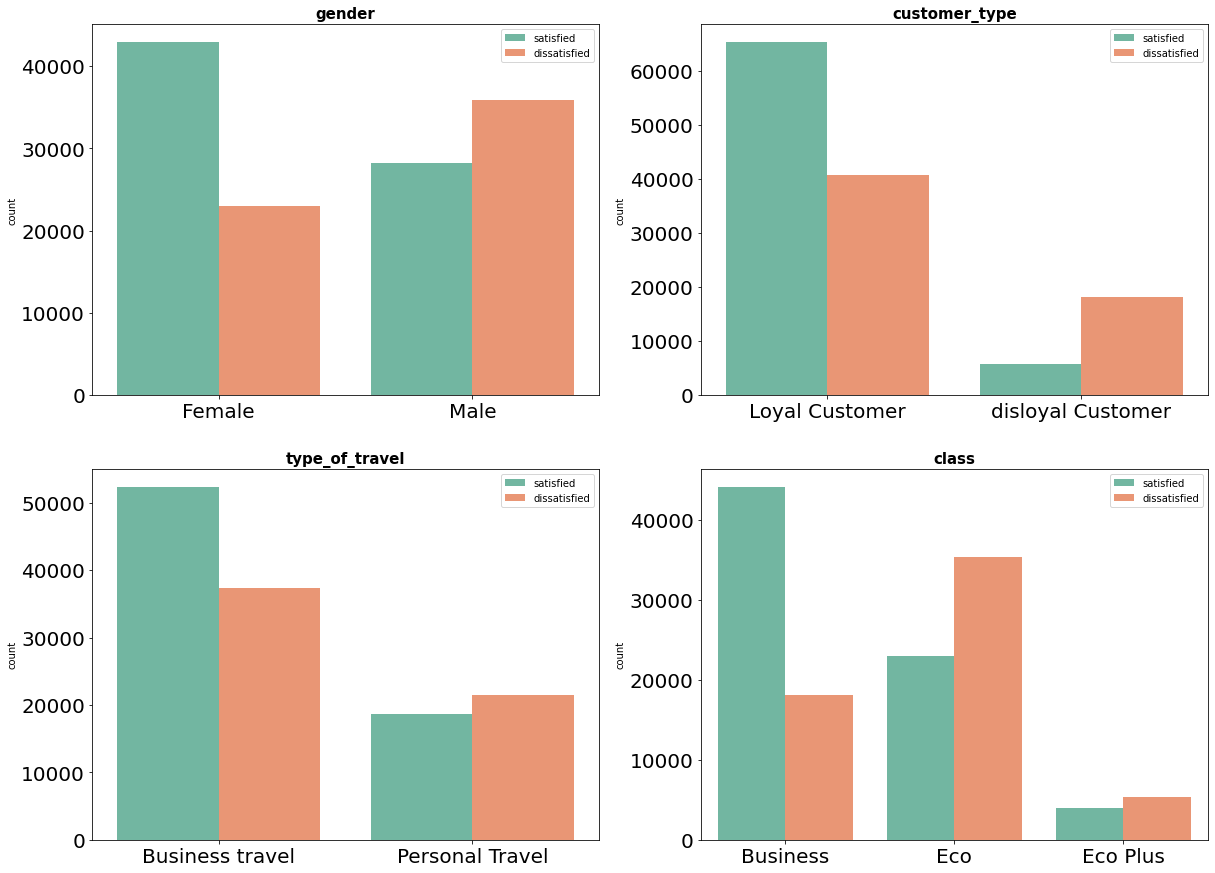

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))

axes = axes.flat



for i, colum in enumerate(lista_categoricas): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction", 
        ax = axes[i], palette="Set2")
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

In [ ]:
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

In [ ]:
df['customer_type'].unique()

['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']

In [ ]:
df['customer_type'] = df['customer_type'].map({'Loyal Customer':2, 'disloyal Customer' :1 })

In [ ]:
df['type_of_travel'].unique

<bound method Series.unique of 0         Personal Travel
1         Personal Travel
2         Personal Travel
3         Personal Travel
4         Personal Travel
               ...       
129875    Personal Travel
129876    Personal Travel
129877    Personal Travel
129878    Personal Travel
129879    Personal Travel
Name: type_of_travel, Length: 129880, dtype: category
Categories (2, object): ['Business travel', 'Personal Travel']>

In [ ]:
df['type_of_travel'] = df['type_of_travel'].map({'Personal Travel': 1, 'Business travel': 2})

In [ ]:
df['class'] = df['class'].map({'Business': 2, 'Eco':1, 'Eco Plus':1})

In [ ]:
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,arrival_delay_in_minutes,age,flight_distance
0,satisfied,1,2,1,1,0,0,2,2,4,2,3,0,3,5,3,2,0.0,1.041667,-1.400844
1,satisfied,0,2,1,2,0,0,3,0,2,2,4,4,4,2,3,2,305.0,0.291667,0.454852
2,satisfied,1,2,1,1,0,0,3,2,0,2,3,3,4,4,4,2,0.0,-1.041667,0.179747
3,satisfied,1,2,1,1,0,0,3,3,4,3,1,0,1,4,1,3,0.0,0.833333,-1.098734
4,satisfied,1,2,1,1,0,0,3,4,3,4,2,0,2,4,2,5,0.0,1.250000,-1.325738


Codificamos la variable respuesta

In [ ]:
df['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [ ]:
df['satisfaction'] = df['satisfaction'].map({'dissatisfied':0, 'satisfied':1})

In [ ]:
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,arrival_delay_in_minutes,age,flight_distance
0,1,1,2,1,1,0,0,2,2,4,2,3,0,3,5,3,2,0.0,1.041667,-1.400844
1,1,0,2,1,2,0,0,3,0,2,2,4,4,4,2,3,2,305.0,0.291667,0.454852
2,1,1,2,1,1,0,0,3,2,0,2,3,3,4,4,4,2,0.0,-1.041667,0.179747
3,1,1,2,1,1,0,0,3,3,4,3,1,0,1,4,1,3,0.0,0.833333,-1.098734
4,1,1,2,1,1,0,0,3,4,3,4,2,0,2,4,2,5,0.0,1.250000,-1.325738


In [ ]:
df.to_pickle('../datos/Invistico_Airline_v3.pkl')
